In [ ]:
1.Import all essential libraries
2.Data loading
3.EDA :- Exploratory Data Analysis
    i) treating null values ii)Duplicate values iii)outliers
4.Data Visualisation
5.Feature selection- kmeans(unsupervised learning model)
6.Model creation

In [70]:
##import all essential libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv('Mall_Customers[1].csv')

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [ ]:
## Data Visualization
# perform different visual plots for Analysis of data

In [76]:
import seaborn as sns

<AxesSubplot:>

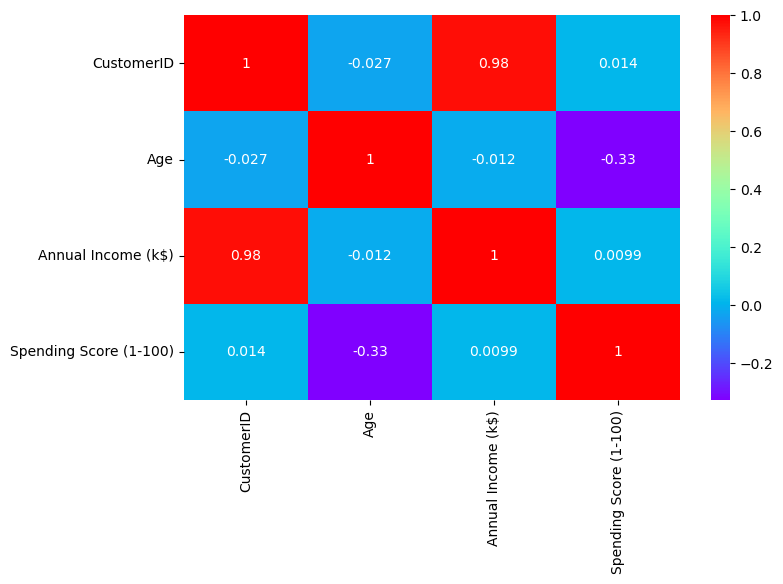

In [77]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap="rainbow",annot=True)

In [78]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [79]:
col=list(df.columns)

In [80]:
col

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [81]:
#outlier detention

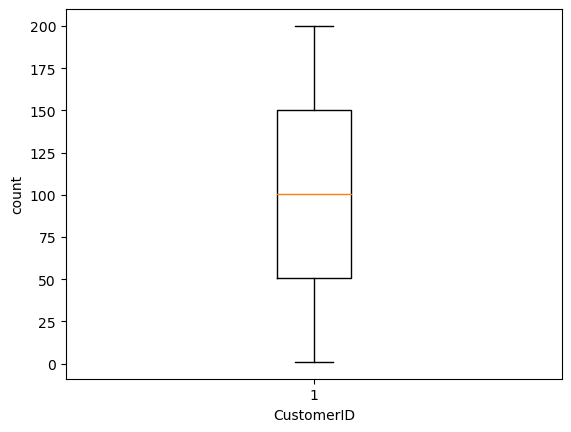

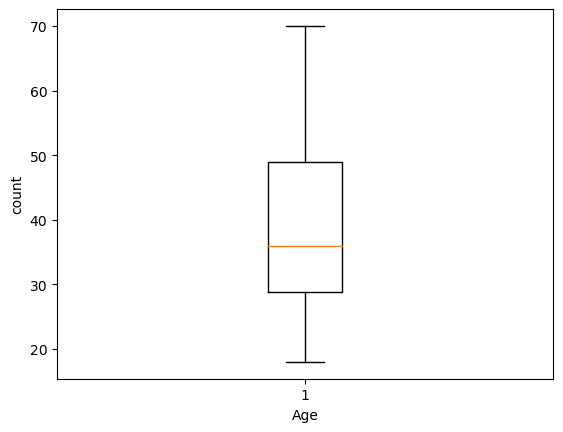

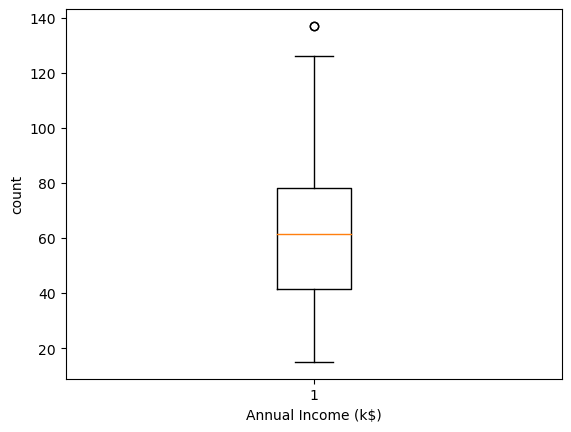

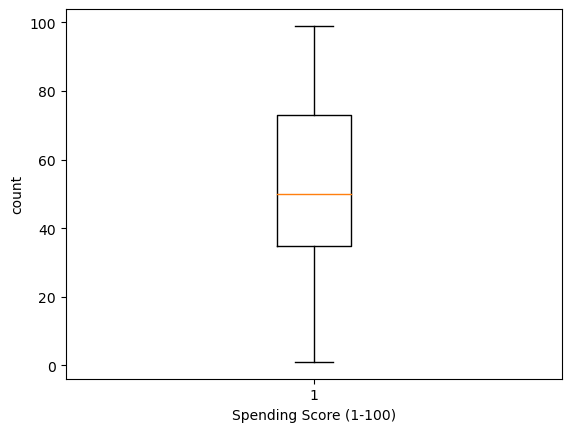

In [82]:
for col_name in col:
    if (df[col_name].dtypes == 'int64' or df[col_name].dtypes == 'float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [ ]:
## There is no outliers detect in this data

In [84]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [100]:
df=df.drop(['Gender'],axis=1)

In [101]:
# Rescaling the Features
import sklearn
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled 

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [103]:
from sklearn.cluster import KMeans

In [104]:
clusters=list(range(2,8))
ssd=[]
for cluster_num in clusters:
    model=KMeans(n_clusters=cluster_num,max_iter=150,random_state=45)
    model.fit(df)
    ssd.append(model.inertia_)

In [105]:
ssd

[387016.6872687269,
 271335.3503523991,
 195352.47984407307,
 157457.1233603239,
 122553.16204779182,
 103184.48446143228]

In [106]:
clusters

[2, 3, 4, 5, 6, 7]

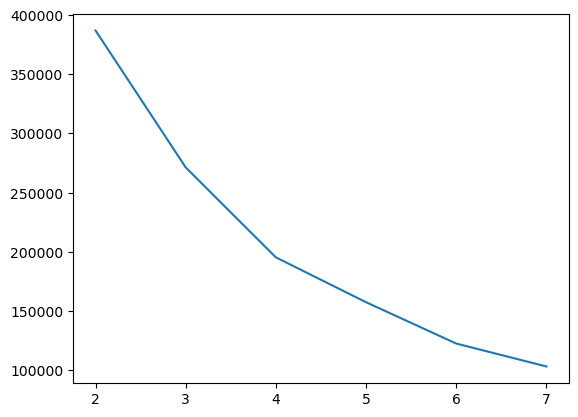

In [107]:
# Elbow Curve
plt.plot(clusters,ssd)

In [108]:
Kmodel=KMeans(n_clusters=4,max_iter=150,random_state=45)
Kmodel.fit(df)

KMeans(max_iter=150, n_clusters=4, random_state=45)

In [109]:
Kmodel.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [110]:
df["cluster ID"]=Kmodel.labels_

In [111]:
df.tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster ID
195,196,35,120,79,2
196,197,45,126,28,0
197,198,32,126,74,2
198,199,32,137,18,0
199,200,30,137,83,2
